Proxima clase: Redes neuronales:

* Modelo de McCulloch and Pitts.
* problema XOR.
* Propagacion hacia adelante.
* propagacion hacia atras.

## Modelo de McCulloch-Pitts
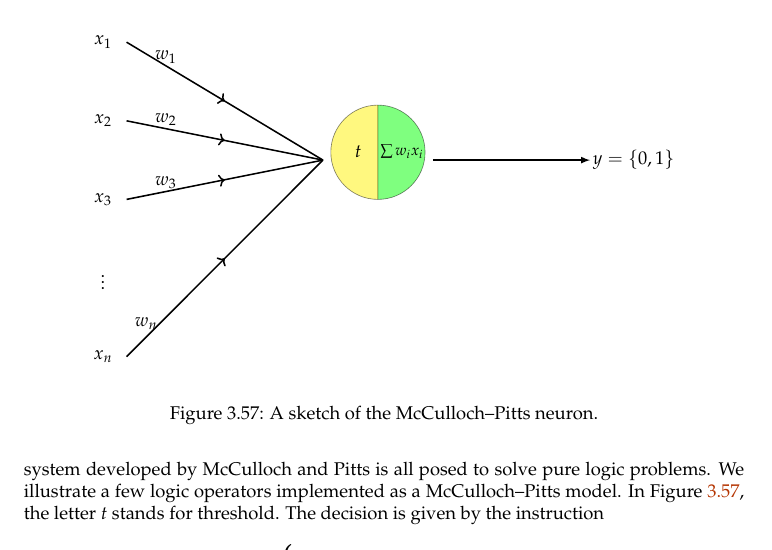

En los modelos de McCulloch-Pitts vamos a usar 2 datos $x_1,x_2$, los pesos son solo $1,-1$, el $-1$ es para la negacion. Los molodeos logicos que veremos son el "or", "and", "nor", "xor" ,"no" (este ultimo es la negacion). En Espanhol (o, y, xor=o exclusivo, ni o ni i=nor).

Empezamos con el `or`.

* Modelo logicos `or`:

| $x_1$ | $x_2 $ | $$\sum_i w_i x_i = x_1 + x_2 $$ | $ \ge \text{threshold}$ | $ x_1 \text{ or } x_2 $  |
|---|---|:-----:|-------|:------|
| 1 | 1 | 2 | 1  | 1 |
| 1 | 0 | 1 | 1 | 1 |
| 0 | 1 | 1 | 1 | 1 |
| 0 | 0 | 0 | 1 | 0 




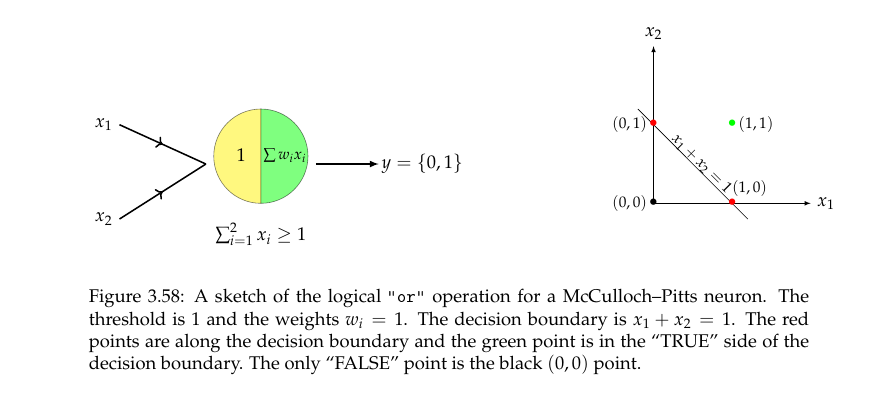

* modelo logico "y" ("and")


| $x_1$ | $x_2 $ | $$ \sum_i w_i x_i = x_1 + x_2 $$ | $ \ge \text{threshold}$ | $ x_1 \text{ and } x_2 $  |
|---|---|:-----:|-------|:------|
| 1 | 1 | 2 | 2  | 1 |
| 1 | 0 | 1 | 2 | 0 |
| 0 | 1 | 1 | 2 | 0 |
| 0 | 0 | 0 | 2 | 0 |


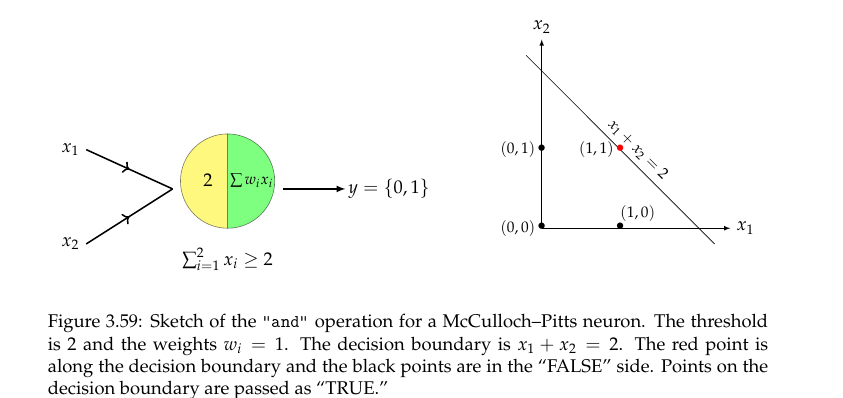

* nor (ni estudia ni trabaja, ni raja ni presta el hacha).
nor(A,B)=No(A) y No(B).



| $x_1$ | $x_2 $ | $$ \sum_i w_i x_i = -x_1 - x_2 $$ | $ \ge \text{threshold}$ | $ x_1 \text{ nor } x_2 $  |
|---|---|:-----:|-------|:------|
| 1 | 1 | -2 | 0  | 0 |
| 1 | 0 | -1 | 0 | 0|
| 0 | 1 | -1 | 0 | 0 |
| 0 | 0 | 0 |  0 | 1 |

La grafica de la neurona del "nor" la dejo como tarea.

* xor: este **no se puede** implementar con el modelo de McCulloc and Pits y dio lugar a la necesitad de mas capas llamas **ocultas**. Eso lo vemos al final de esta clase, o mas probablemente en la proxima clase. xor= o exclusivo. Es decir, o el uno, o el otro pero no los dos, ni nunguno. 

Tratemos hacer la tabla.

| $x_1$ | $x_2 $ | $$ \sum_i w_i x_i = x_1 + x_2 $$ | $ \ge \text{threshold}$ | $ x_1 \text{ xor } x_2 $  |
|---|---|:-----:|-------|:------|
| 1 | 1 | 2 | ? | 0 |
| 1 | 0 | 1 | ? | 1 |
| 0 | 1 | 1 | ? | 1 |
| 0 | 0 | 0 | ? | 0 |

Si quiere, por prueba y error, busque un umbral. No lo va encontrar.


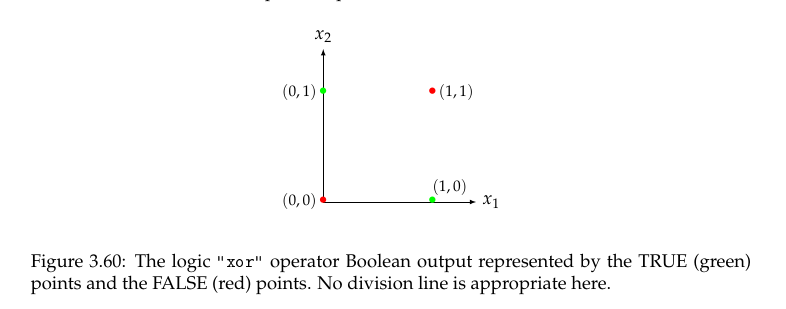

## Funciones de Activacion:

[graficas de neuronas](https://www.dreamstime.com/photos-images/axon-dendrite.html)


Las funciones de activacion tiene varias propiedades:

* Pueden hacer que una red neuronal se aleja de la linealidad. Veremos que reas neuronales con activaciones lineales no van mas alla de una regresion lineal. El el caso de McCulloc and Pits dijimos
$\sum w_i x_i$, en este caso la activacion la identidad

Usted tiene los $x_i$ los pesa con $w_i$, es en este momento donde
se aplica la activacion. En este momento tenemos $w_1 x_1 + w_2 x_2$,
esto lo pasamos por un "filtro". Por ejemplo la funcion logistica sigmoide

$$ S(w_1 x_1 + w_2 x_2) = \frac{1}{1 + \exp(-w_1 x_1 - w_2 x_2)}$$

Si la funcion de activacion fuese la identidad

$I(w_1 x_1 + w_2 x_2) = w_1 x_1 + w_2 x_2$ esto no pasa de ser regresion lineal.

La universalidad de las redes dicen que una ANN se ajusta a "lo que queramos". Pero si la activacion es lineal, entonces las ANN solo se ajustarian a modelos lineales lo cual reduce enormemente su potencial.

El poder de las ANN reside en la posibilidad de modelar coceptos no lineales. 

Algunas funciones de activacion son.

* La identidad. Esta simplemente reduce una ANN a una regresion lineal. Ya lo discimos arriba.

* La Heaviside (step, escalonada).

$$ \text{Heavisde}(t) = \left \{ \begin{array}{cc} 1 & \text{ si } t \ge 0 \\ 0 & \text{ si } t < 0 \end{array} \right . $$


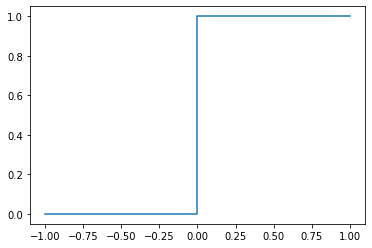

In [5]:
import matplotlib.pyplot as plt 
import numpy as np  

x = [-1, 0, 1]
y = [0, 0, 1]

plt.step(x,y)

* logistic (sigmoid).

$$ S(t) = \frac{1}{1 + \exp(-t)} $$

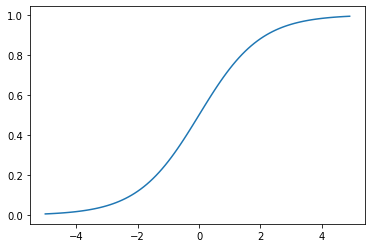

In [7]:
def S(t):
    return 1/(1 + np.exp(-t))

x = np.arange(-5,5, 0.1)
plt.plot(x, S(x))

In [19]:
t=0.5
a = S(2)
def decide(a):
    if a > 0.5:
        return True
    else: 
        return False

decide(S(-2))

False

0.8807970779778823

de todas las funciones de activacion la sigmoid logistic es la que mas se parece a una probabilidad. Esta entre 0 y 1, es monotona creciente, y ya discutimos el concepto de "odds" (chances) y como este da lugar de forma natural a la funcion logisitca. 

Que problema se presento con la logistica. Para el descenso con el gradiente, el gradiente no puede ses muy pequenho.

$$ \theta_i = \theta_{i-1} - \alpha \nabla_{\theta} J (\theta_{i-1}) $$

Si $| J | \ll 1$, entonces $\theta_i \approx \theta_{i-1}$, el sistema o aprende muy lento o no aprende. 

Matematicamente es claro que para $t \gg 1$, $S(t) \approx 1$
y para $t \ll 0$, $S(t) \approx 0$. Pero como

$$S'(t) = S(t) (1 - S(t))  $$
si $S(t)$ esta cerca a 1 (para $t \gg 0$) o a cero (para $t\ll 0$) entonces $\nabla J \approx 0$ y el sistema no aprende.

A este fenomeno se lo conoce como el **vanishing gradiente**.

[ver este link, y otros parecidos](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

Entonoces la sigmoid presento problemas en los 90s.

Se creo otra funcion de activacion (que tambien presenta el vanishing gradient problem).

* Tangente hiperobolica. $y=\tanh(t)$, produjo mejores resultados en muchos casos que la logistica (tambien es sigmoid).





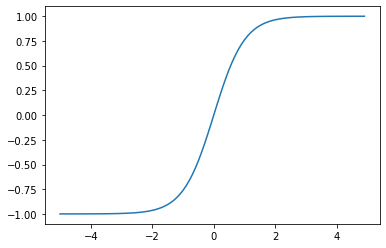

In [21]:
x=np.arange(-5,5,0.1)
plt.plot(x, np.tanh(x))

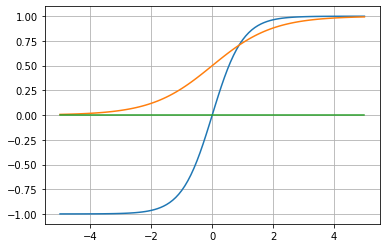

In [29]:
x=np.arange(-5,5.1,0.1)
plt.plot(x, np.tanh(x))
plt.plot(x, S(x))
myZero = np.zeros(len(x))
plt.plot(x, myZero)
plt.grid()
plt.show()

Obvserve que tambien se aplana (la tangente) para valores $|t| \gg 1$. Se deja como ejercicio al estudiante verificar esto.

Sin embargo se dice que
[la tanh(t) es mejor que la S(t)](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6),
La vez por que mapea 0 a0, negativos a negativos y positivos a positivos. No es una funcion de probabilidad. 

El rango de $\tanh$ es $(-1,1)$, $\tanh = \sinh/\cosh=(\exp(t)-\exp(-t))/(\exp(t) + \exp(-t))$


La siguiente es 
*ReLU: Rectified Linear Unit.


$$ \text{ReLU} = \left \{
    \begin{array}{cc}
    0 & \text{ si } x \le 0 \\
    1 & \text{ si } x > 0 
    \end{array}
    \right .  
$$

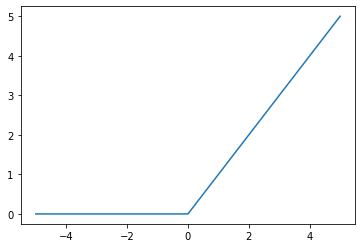

In [35]:
# def ReLU(x):
#     if x < 0 :
#         return 0
#     else:
#         return x

# otra forma es el max(0,x)

def ReLU(x):
    return max(0,x)

# una  lista con la funcion
R = [ReLU(t) for t in x ]
plt.plot(x, R)  # aveces toca convertir la lasta a array
# R2 = np.array(R)
# plt.plot(x,R2)







Cuando la logistic y tanh fallaban por el **vanishing gradient** vino la ReLU  a ayudar. Observe que sobre la derecha el gradiente de la ReLU es 1 (nunca se reduce), pero a la derecha es 0. 
La ReLU es la mas popular de todas las funciones de activacion.

Sin embargo a la izquierda el gradiente se hace 0 y esto crea un problema llamado el **dying neuron** (la nuerona agonizante).
El problema es que la neurona muere y se no se recobra. 
$\theta_i = \theta_{i-1}= \theta_{i-2}$, el sistema no aprende.

No es la panacea pero fue de gran utilidad despues del 2000.




* Leaky ReLU. Como la ReLU presenta el problema de la neurona agonizante, se inveto la **Leaky ReLU**. A la izquierda tiene otra
funcion lineal que no es $f(x)=x$, es $f(x)= \alpha x$, $\alpha < 1$.

Mejor dicho

$$ \text{Leaky ReLU} = \left \{
    \begin{array}{cc}
       \alpha t  & \text{ si } t \le 0 \\
       t  & \text{ si } t > 0 
    \end{array}
    \right . 
$$

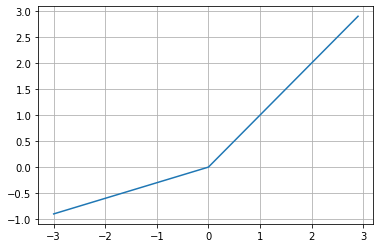

In [38]:
def leakyReLU(t, a):
    if t < 0 : 
        return a*t
    else:
        return t


x = np.arange(-3,3,0.1)
a=0.3
R = [leakyReLU(t,a) for t in x]

plt.grid()

plt.plot(x, R)



La leaky ReLU no es diferenciable en 0 (tiene una esquina, codo).
Se crea la ELU: Exponential Liear function.


$$ \text{ELU} = \left \{
    \begin{array}{cc}
       \alpha (\mathrm{e}^t - 1)  & \text{ si } t \le 0 \\
       t  & \text{ si } t > 0 
    \end{array}
    \right . 
$$
Si $\alpha=1$ es diferenciable en 0. Ejercicio de calculo diferencial.



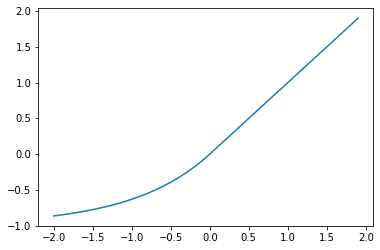

In [42]:
def ELU(t, a):
    if t < 0 :
        return a*(np.exp(t)-1)
    else:
        return t

x = np.arange(-2,2,0.1)
a=1
R = [ELU(t,a) for t in x ]
plt.plot(x,R)

La softmax. La vimos en clase anterior. Revisela.  Es para multiclase.
Una exponencial sobre suma de exponenciales.


En general una red (con solo tres capas).

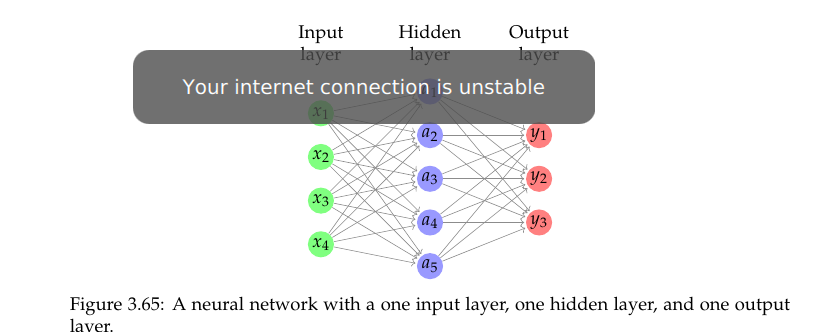

Los aspectos princiaples en el desarrollo de una red nueronal son: 

* propagacion hacia adelante (forward propagation)
* la propagacion hacia atras (back propagation).

## Forward propagation:
Como procesos puede ser complejo, lo hacemos de abajo hacia arriba. Es decir, de simple a complejo.

Redes con una capa de entrada, una oculta y una de salida.

* Un nodo de entrada, uno oculto y uno de salida.



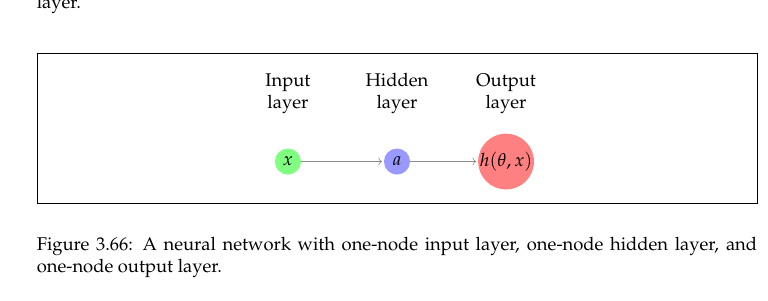

Como se calcula la red.

* La entrada $x$ se pesa con el peso $\theta$ (lineal que lo vamos a llamar $z^{(2)}$, $z^{(2)}=\theta^{(1)} x$, luego

* El $z$ se pasa por la funcion de activacion. En estos ejemplos usamos la logistic $S(z)$.

$$ S(z) = \frac{1}{1 + \exp(-z)} = \frac{1}{1 + \exp(-\theta x)} $$

* A $S(z)$ lo llamamos la activacion $a$, finalmente pesamos la activacicon con el segundo $\theta^{(2)}$ y esta seria la hipotesis.

Es decir $z^{(3)} = a^{(2)} \theta^{(2)}$

$$ h(\theta, x) = S(z^{(3)}) = \frac{1}{1 + \exp( -z^{(3)})}$$




* muchos de entrada, uno oculto y uno salida.

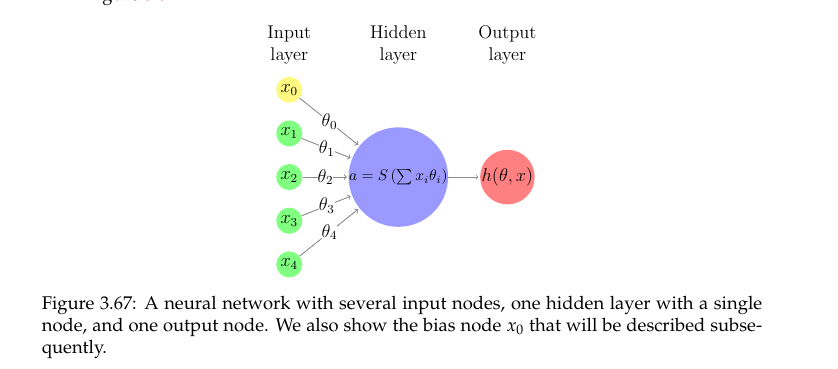

Los tres pasos son:

* Se pesan las entradas con el ahora vector $\theta^{(1)}$. 
Esto da
$$ z^{(2)} = \sum x_i \theta_i$$

* Se aplica la activacion a este proceso lineal.

$$ a^{(2)} = S(z^{(2)}) = \frac{1}{1+ \exp( -z^{(2)}) } $$

* Pesamos esta activacion con el proximo $\theta^{(2)}$, es decir
$z^{(3)} = a^{(2)} \theta^{(2)}$ y aplicamos la activacion para obtener $h(\theta, x)$. Es decir

\begin{eqnarray}
z^{(3)} = a^{(2)} \theta^{(2)} \\
h(\Theta, x)  = a^{(3)} = S(z^{(3)}) = \frac{1}{1 + \exp(-{z^{(3)}})} 
\end{eqnarray}

* Muchos de entrada, muchos ocultos y uno de salida
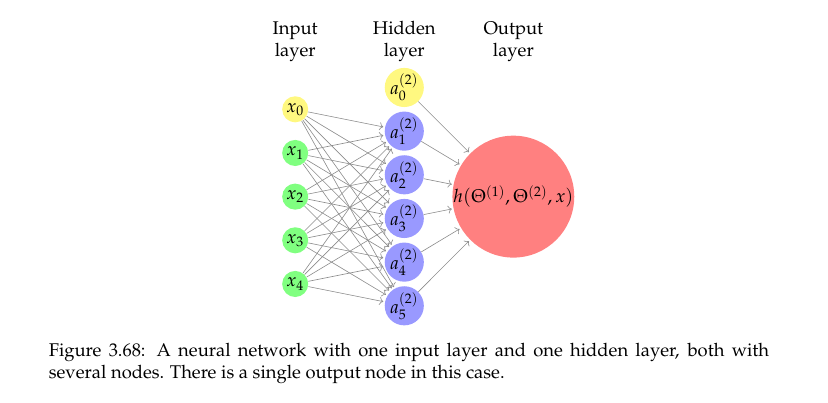

Cada $z$ del centro es un producto interno entre la entrada $x$ y una columna de la, ahora, matriz $\Theta^{(1)}$.

Es decir

* Parte lineal de entrada a oculta

$$ z_1^{(2)}(\theta, x) = \sum_{j=0}^n x_j \theta_{j1}^{(1)} $$
$$ z_2^{(2)}(\theta, x) = \sum_{j=0}^n x_j \theta_{j2}^{(1)} $$
y asi suscesivamente

$$ z_1^{(p)}(\theta, x) = \sum_{j=0}^n x_j \theta_{jp}^{(1)} $$

Esto se puede **vectorizar** como un producto de dos matrices, o en este caso, un vector por una matriz

En general

$$ z_i^{(2)}(\theta, x) = \sum_{j=0}^n x_j \Theta_{ji}^{(1)}  $$

$$z^{(2)} = x^T \Theta^{(1)} $$

Este vector es fila, si lo queremos columna, no hay problema

$$z^{(2)} = (\Theta^{(1)})^{T} x $$

* Vamos de la capa 2 a la capa 3. Tenemos un producto interno, o suma ponderda con los $\Theta^{(2)}$ es un vector. 

$$ z^{(3)} = \sum_{j=0}^p  a_j^{(2)} \Theta_j^{(2)}  $$
Este es un numero. 

* Ultimo paso

$$ h(\theta, x) = a^{(3)} = S(z^{(3)}) = \frac{1}{1 + \exp(- z^{(3)})} $$




* Muchos de entrada, muchos ocultos y muchos de salida
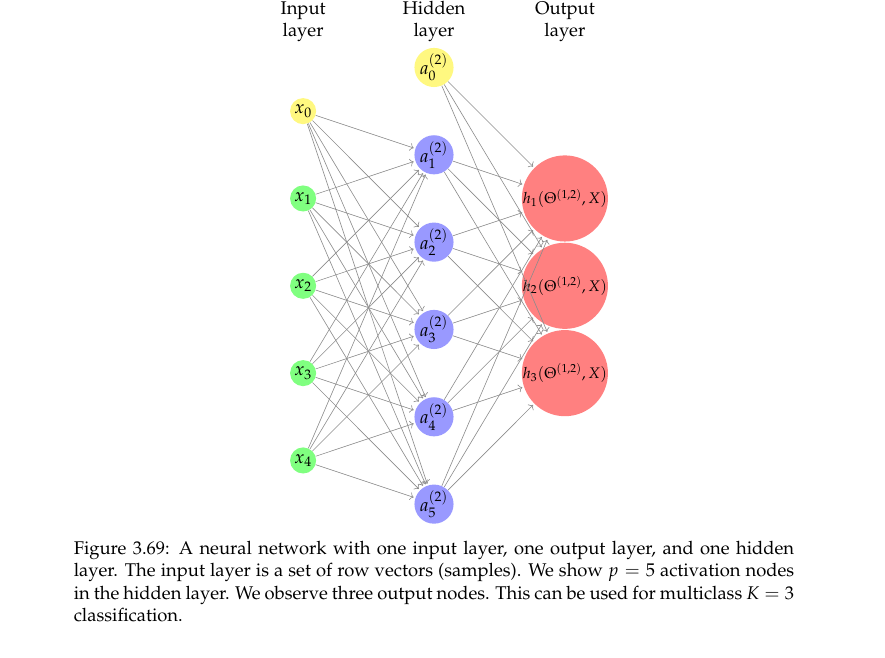


* Lo que pasa entre las capas 1 (de entrada) y 2 (oculta) es lo mismo que el caso anterior. Tenemos una multiplicacion del vector $x$ por la matriz $\Theta^{(1)}$.

$$ z_j^{(2)} = x^T \Theta_j^{(1)}$$

Esto toca activarlo

$$ a_i^{(2)} = S(z^{(2)} = \frac{1}{1 + \exp(- z_i^{(2)})} \quad , \quad i=1,2, \cdots, p $$

* Estamos en el medio vamos hacia la capa 3.
$$ z_j^{(3)} = (a^{(2)})^T \Theta_j^{(2)}$$

Esto toca activarlo

$$ a_i^{(3)} = S(z^{(3)}) = \frac{1}{1 + \exp(- z_i^{(3)})} \quad , \quad i=1,2, \cdots, p $$

* El ultimo caso es cuando cada neurona de entrada $x_i$ es una matriz. 
Por ejemplo si tiene una imagen en pixeles y tiene 3 canales (RGB).


En este caso:


$$ z_{ij}^{(2)} = x_j^T \Theta_i^{(1)}$$

Esto toca activarlo

$$ a_{ij}^{(2)} = S(z_{ij}^{(2)} = \frac{1}{1 + \exp(- z_{ij}^{(2)})} \quad , \quad i=1,2, \cdots, m \quad , \quad j=1,2, \cdots, p  $$

* Estamos en el medio vamos hacia la capa 3.
$$ z_{ij}^{(3)} = (a_i^{(2)})^T \Theta_j^{(2)}$$

Esto toca activarlo

$$ a_{ij}^{(3)} = S(z_{ij}^{(3)}) = \frac{1}{1 + \exp(- z_{ij}^{(3)})} \quad , \quad i=1,2, \cdots, m \quad , \quad j=1,2, \cdots p.  $$


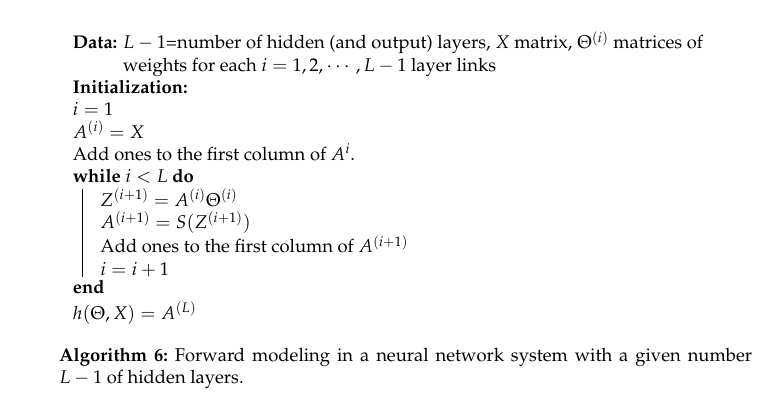